In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../../../data/titanic_train.csv')

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Распределение выживших людей в первом классе
    для начала необходимо выбрать лишь людей из первого класса

In [8]:
first_class = df[df.Pclass == 1]
print (f"Количество людей в первом классе: {first_class.shape[0]} \n В % соотношении: {first_class.shape[0]/df.shape[0]} ")

Количество людей в первом классе: 216 
 В % соотношении: 0.24242424242424243 


Добавим к фрейму классы пола для удобства

In [12]:
first_class = pd.get_dummies(first_class,columns=['Sex'])
first_class.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,0,1


Посмотрим на распределение возраста у 1 класса

[]

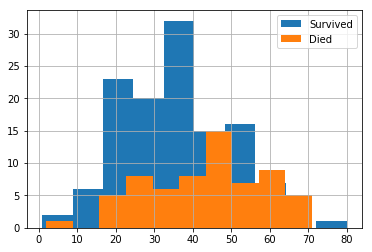

In [77]:
h1 = first_class[first_class.Survived == 1].Age.hist()
h2 = first_class[first_class.Survived == 0].Age.hist()
h2.legend(["Survived","Died"])
plt.plot()

Как мы видим, особой зависимости между выживаемость и возрастом нет, Выживших банально больше

In [91]:
print(f"Во скольк раз выживших больше среди первого класса: {first_class[first_class.Survived == 1].shape[0]/first_class[first_class.Survived == 0].shape[0]}")
print(f"Во сколько раз выживших больше {df[df.Survived == 1].shape[0]/df[df.Survived == 0].shape[0]}")

Во скольк раз выживших больше среди первого класса: 1.7
Во сколько раз выживших больше 0.6229508196721312


Корреляции всех признаков 

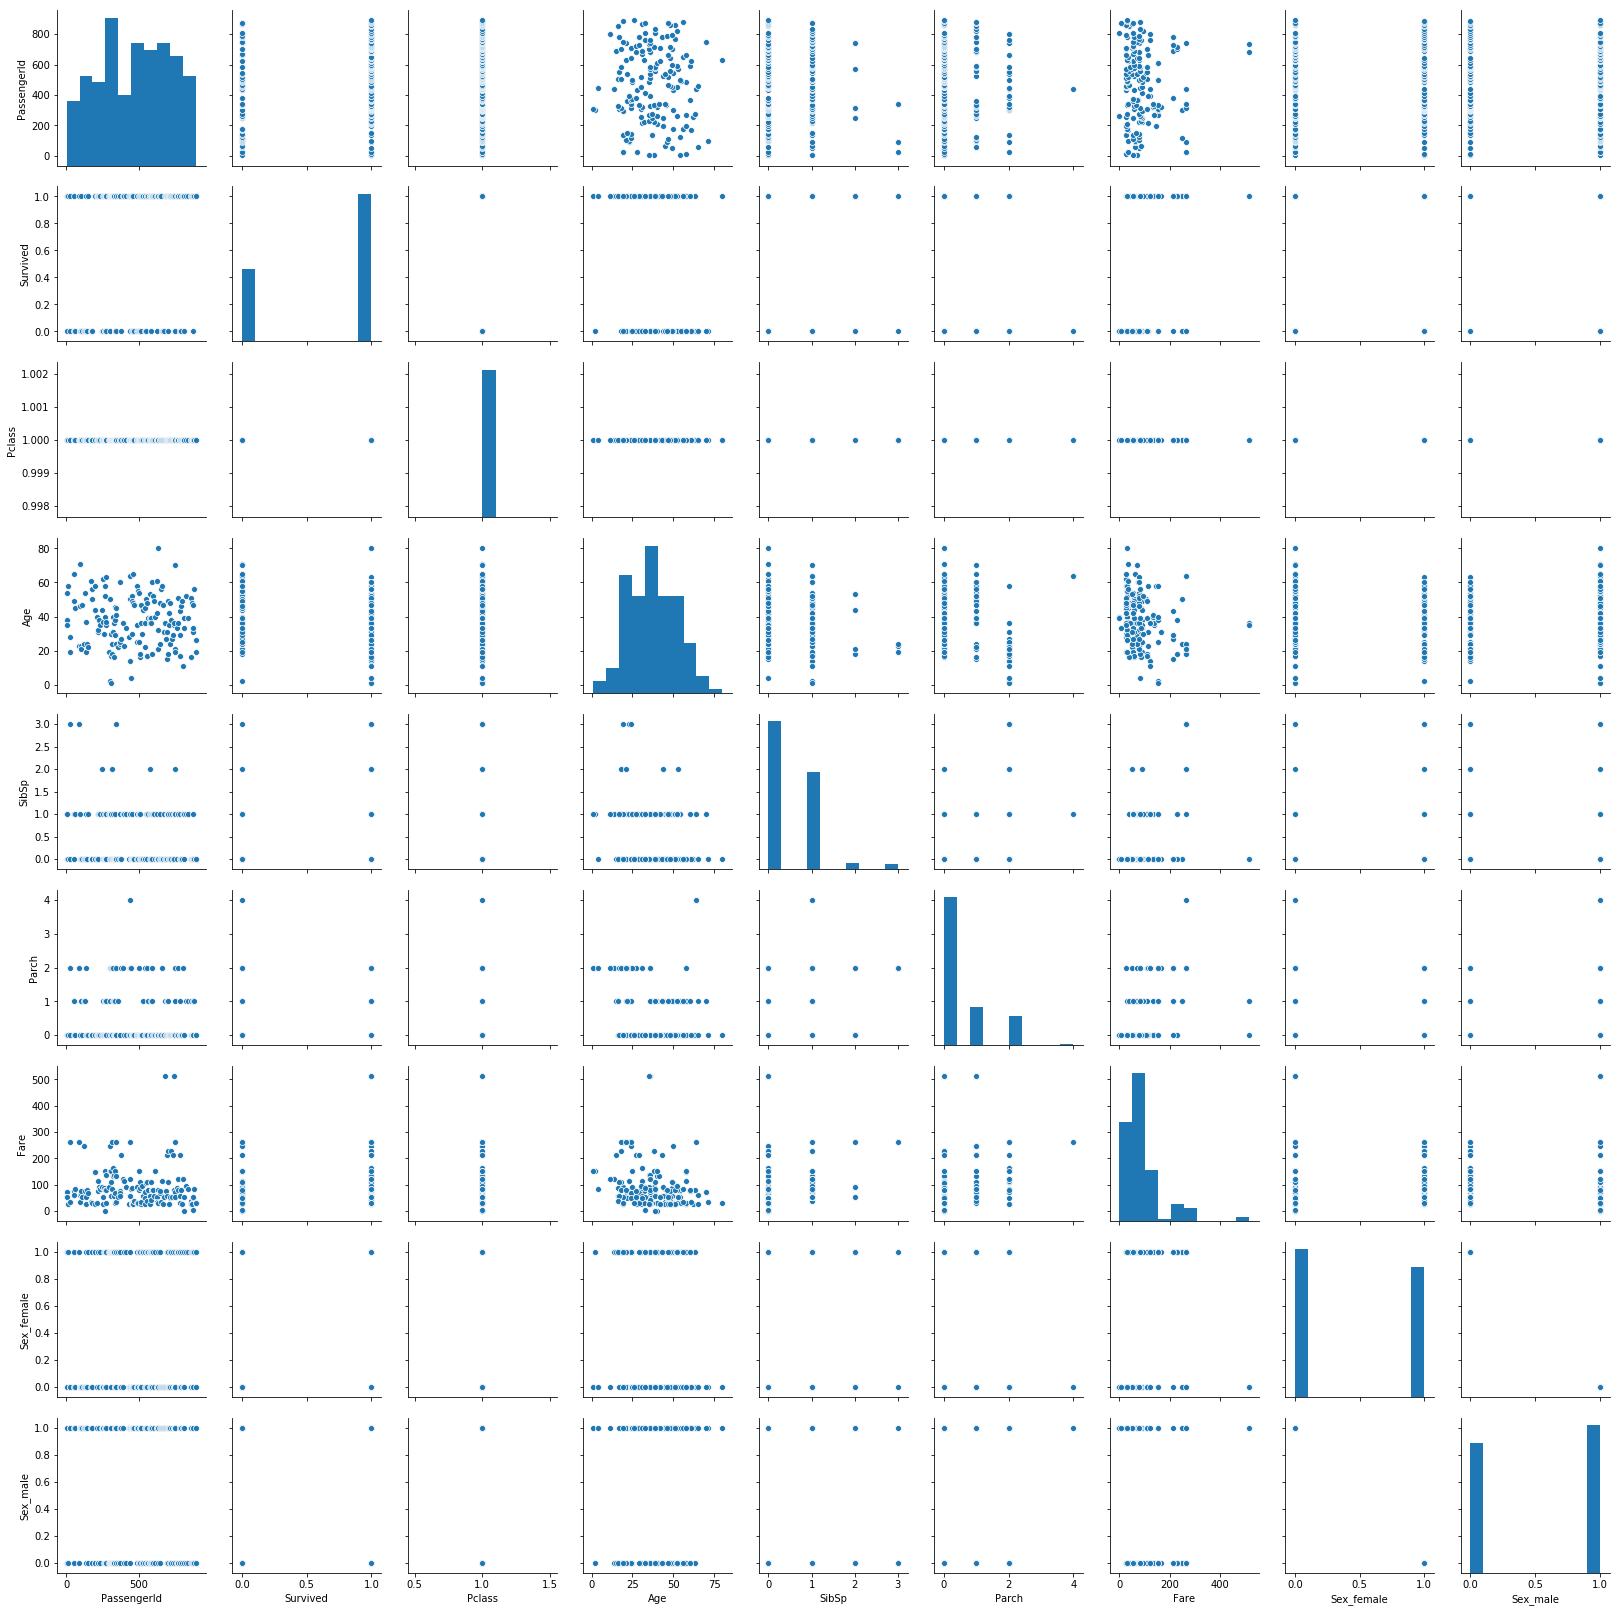

In [102]:
first_class_cleared = first_class.dropna()
sns.pairplot(first_class_cleared)

Никаких особо явных признаков связанных с выживаемостью не наблюдается.
Посмотрим разброс выживших в первом классе в зависимости от пола

In [112]:
male_survived = first_class[(first_class.Survived == 1) & (first_class.Sex_male == 1)]
female_survived = first_class[(first_class.Survived) == 1 & (first_class.Sex_male == 0)]
male_died = first_class[(first_class.Survived) == 0 & (first_class.Sex_male == 1)]
female_died = first_class[(first_class.Survived) == 0 & (first_class.Sex_male == 0)]

<BarContainer object of 4 artists>

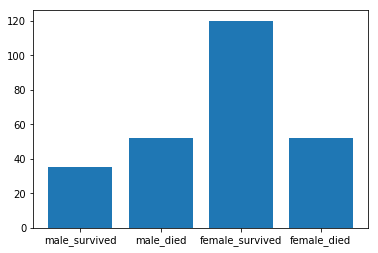

In [119]:
bar_info = ['male_survived','male_died','female_survived','female_died']
bar_height = [male_survived.shape[0],male_died.shape[0],female_survived.shape[0],female_died.shape[0]]
plt.bar(bar_info,bar_height)

На графике явно видно, что вероятность выжить в первом классе наиболее высока у женщин, даже визуально их выжило в двое больше, чем умерло, а у мужского же пола разница не столь высока

## Уже на данном этапе можно сказать, что наибольшая вероятность выжить среди пассажиров первого класса у женщин, однако ради интереса можно посмотреть разброc для пассажиров разных городов

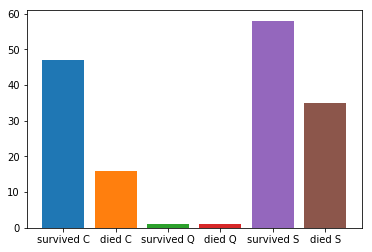

In [146]:
survived = first_class_cleared[first_class_cleared.Survived == 1].groupby('Embarked').Survived.count()
died = first_class_cleared[first_class_cleared.Survived == 0].groupby('Embarked').Survived.count()
plt.bar('survived C',survived['C'])
plt.bar('died C',died['C'])
plt.bar('survived Q',survived['Q'])
plt.bar('died Q',died['Q'])
plt.bar('survived S',survived['S'])
plt.bar('died S',died['S'])
plt.show()

Несмотря на заметную разницу в данном случае, скорее всего данный разброс скорее совпадение, чем закономерность, т.к Титаник банально не добрался ни до одного из указанных мест назначения (Cherbourg,Queenstown,Southampton)

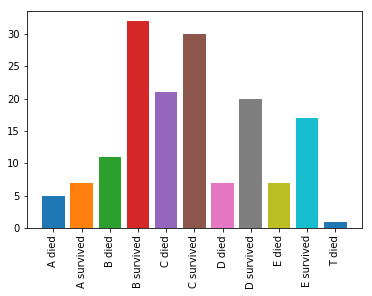

In [183]:
def cabin_type_only(x):
    return x[:1]
copy = first_class_cleared.copy()
copy.Cabin = copy.Cabin.apply(cabin_type_only)
cabin_grouped_survived = copy[copy.Survived == 1].groupby('Cabin').Survived.count()
cabin_grouped_died = copy[copy.Survived == 0].groupby('Cabin').Survived.count()
def bars_plot(data1,data2,label_extend1,label_extend2):
    for k,v in data1.iteritems():
        plt.bar(k+" "+label_extend1,v)
        try:
            plt.bar(k+" "+label_extend2,data2.get(k))
        except:
            pass
        
bars_plot(cabin_grouped_died,cabin_grouped_survived,'died','survived')
plt.xticks(rotation=90)
plt.show()

Взаимосвязи между классом каюты и выживаемости так же не наблюдается

### Вывод
   После визуализации признаков, имеющихся в датасете можно сделать вывод о небольшом количестве прямо влияющих на выживание признаков, а именно класс пассажира (Pclass), в данном случае рассматривался только первый клас, а сам факт нахождения в нём уже повышает шансы на выживание, а так же удалось выяснить, что шансы на выживание зависят от пола человека (у женщин шанс выжить больше) 